# Reducing Commercial Aviation Fatalities

### The task
Build a model to detect troubling events from aircrew’s physiological data. Data acquired from actual pilots in test situations are used.

### Information
***Github-repo:*** https://github.com/sebastianberge/reducing-aviation-fatalities
<br>
***Kaggle-competition:*** https://www.kaggle.com/c/reducing-commercial-aviation-fatalities

### Content
1. [Get the data](#getData)
2. [Visualization of the data](#learning)
3. []()
4. []()
5. []()
6. []()
7. []()

### Disclaimers
This notebook is only for fun and for personal practice in Machine Learning.

## 1 Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
import cufflinks as cf

In [5]:
# For Notebooks
init_notebook_mode(connected=True)

In [6]:
# For offline use
cf.go_offline()

In [7]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

## 2 Visualization of the data

In [8]:
train.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [9]:
test.head()

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,...,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,...,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,...,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,...,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,...,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


### 2.1 Dimensions of train and test data

In [10]:
print('Dimensions of train:', train.shape)
print('Dimensions of test:', test.shape)

Dimensions of train: (4867421, 28)
Dimensions of test: (17965143, 28)


In [11]:
train.columns.values

array(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7',
       'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2',
       'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4',
       'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg',
       'r', 'gsr', 'event'], dtype=object)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
crew          int64
experiment    object
time          float64
seat          int64
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
event         object
dtypes: float64(24), int64(2), object(2)
memory usage: 1.0+ GB


In [13]:
train.describe()

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
count,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,...,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06
mean,5.538783e+00,1.782358e+02,4.999531e-01,3.746336e+00,1.360002e+00,1.213644e+00,7.350926e-02,7.845481e-02,8.675488e-02,2.299909e-01,...,1.208597e+00,6.050047e-01,2.413972e-01,1.947635e-01,6.243715e-01,4.429119e-01,2.393738e-01,5.285460e+03,7.376090e+02,8.518467e+02
std,3.409353e+00,1.039592e+02,5.000000e-01,4.506763e+01,3.518923e+01,3.519242e+01,2.431472e+01,1.803932e+01,1.832606e+01,2.531132e+01,...,4.205516e+01,2.052105e+01,1.660196e+01,1.833801e+01,1.975695e+01,1.974815e+01,2.351859e+01,1.214126e+04,8.187979e+01,5.039324e+02
min,1.000000e+00,3.000000e-03,0.000000e+00,-1.361360e+03,-1.581330e+03,-1.643950e+03,-1.516640e+03,-1.220510e+03,-1.266430e+03,-1.279940e+03,...,-2.333830e+03,-1.212030e+03,-1.228030e+03,-1.229130e+03,-1.230480e+03,-6.962790e+02,-1.176370e+03,-1.858570e+04,4.820600e+02,0.000000e+00
25%,3.000000e+00,8.808100e+01,0.000000e+00,-9.200250e+00,-8.325150e+00,-8.767610e+00,-7.367240e+00,-6.102000e+00,-6.007260e+00,-6.904030e+00,...,-9.306430e+00,-7.495970e+00,-6.713860e+00,-6.774840e+00,-7.161160e+00,-7.817650e+00,-6.526950e+00,-2.550070e+03,6.631430e+02,5.241140e+02
50%,5.000000e+00,1.769297e+02,0.000000e+00,3.819020e-01,4.264100e-02,1.140390e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.667500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.920510e+03,7.434380e+02,7.701970e+02
75%,7.000000e+00,2.683398e+02,1.000000e+00,1.030610e+01,8.753340e+00,9.282560e+00,7.437780e+00,6.176630e+00,6.086460e+00,7.071460e+00,...,9.775770e+00,7.765670e+00,6.831320e+00,6.905020e+00,7.466520e+00,8.025190e+00,6.615180e+00,1.029010e+04,8.134120e+02,1.197120e+03
max,1.300000e+01,3.603711e+02,1.000000e+00,1.972240e+03,2.048790e+03,2.145710e+03,1.731880e+03,9.009370e+02,1.176540e+03,1.514820e+03,...,2.034170e+03,8.917290e+02,9.080890e+02,1.435800e+03,9.284070e+02,6.136690e+02,2.443550e+03,3.418830e+04,8.401840e+02,1.999860e+03


### 2.2 Examination of the target variable

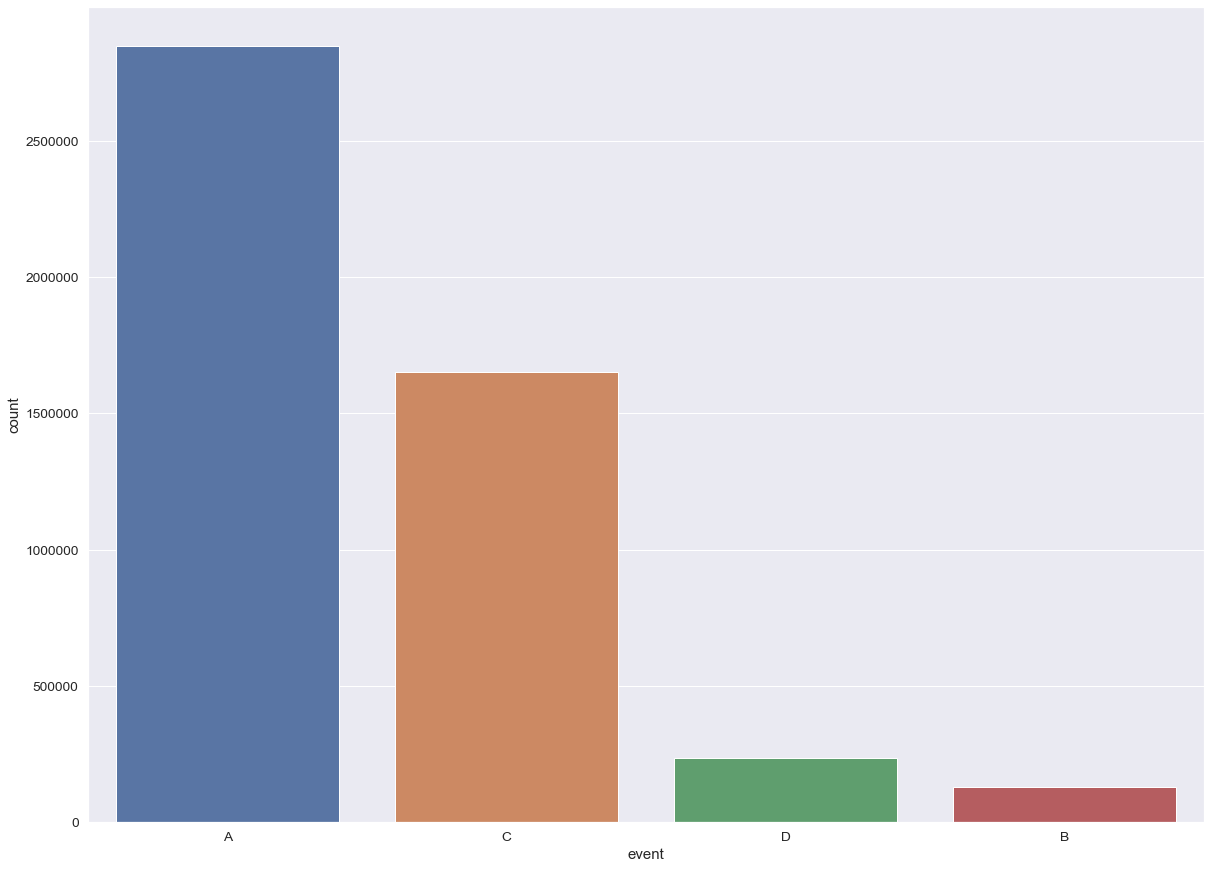

In [41]:
plt.figure(figsize = (20,15))
sns.countplot(train['event'])

Now we have an clear image of the different events occured to the pilots.

***Documentation of what each variable means:***
- **A:** Baseline
- **B:** Startle/Surprise (SS)
- **C:** Channelized Attention (CA)
- **D:** Diverted Attention (DA) 

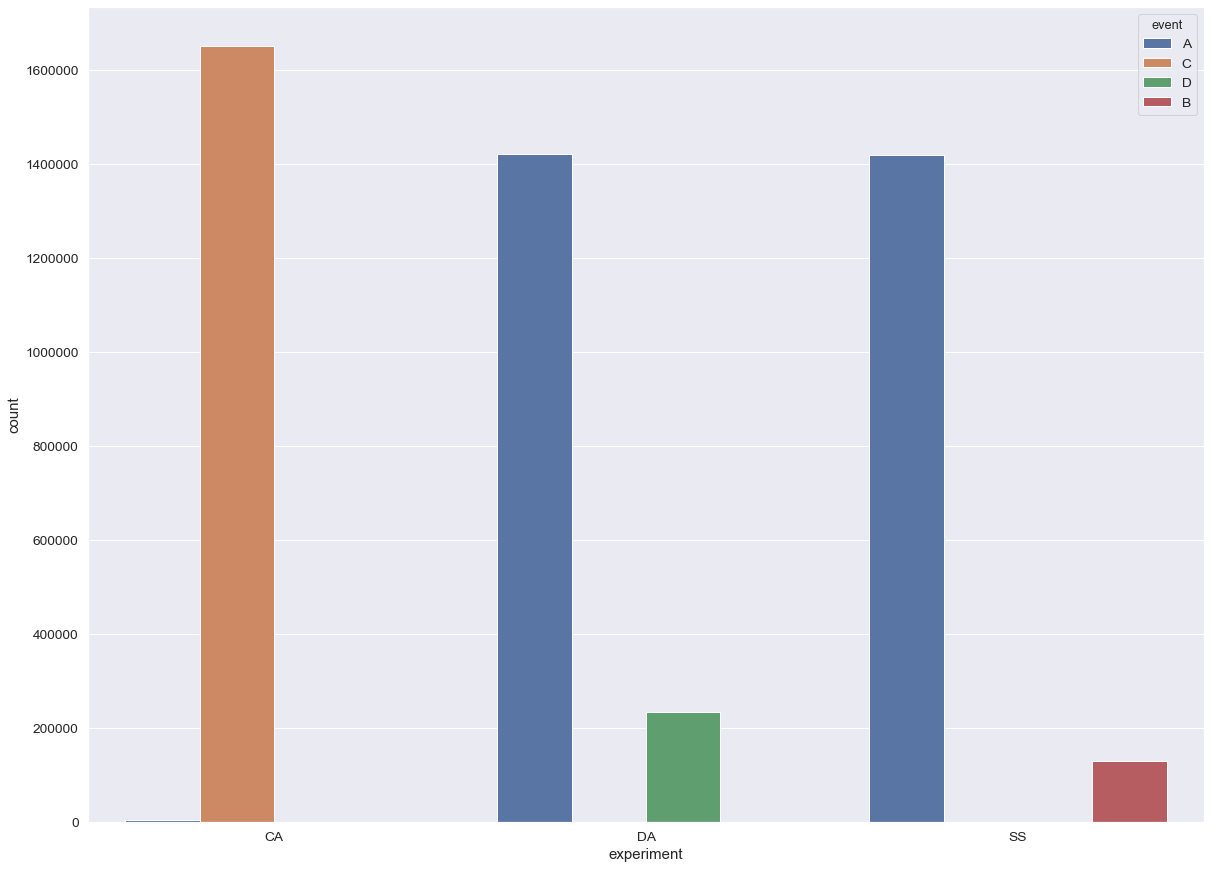

In [40]:
plt.figure(figsize = (20,15))
sns.countplot('experiment', hue = 'event', data = train)

***Documentation of what each experiment could be:***
- Channelized Attention (CA) is, roughly speaking, the state of being focused on one task to the exclusion of all others. This is induced in benchmarking by having the subjects play an engaging puzzle-based video game.
- Diverted Attention (DA) is the state of having one’s attention diverted by actions or thought processes associated with a decision. This is induced by having the subjects perform a display monitoring task. Periodically, a math problem showed up which had to be solved before returning to the monitoring task.
- Startle/Surprise (SS) is induced by having the subjects watch movie clips with jump scares.

We can see that the first experiment, CA, the results are mostly event B. The DA experiment, gave event A as the lead result, however, result D is significant. The SS experiment had also mostly A as a result, but result B cant be ignored.

### 2.3 Correlations

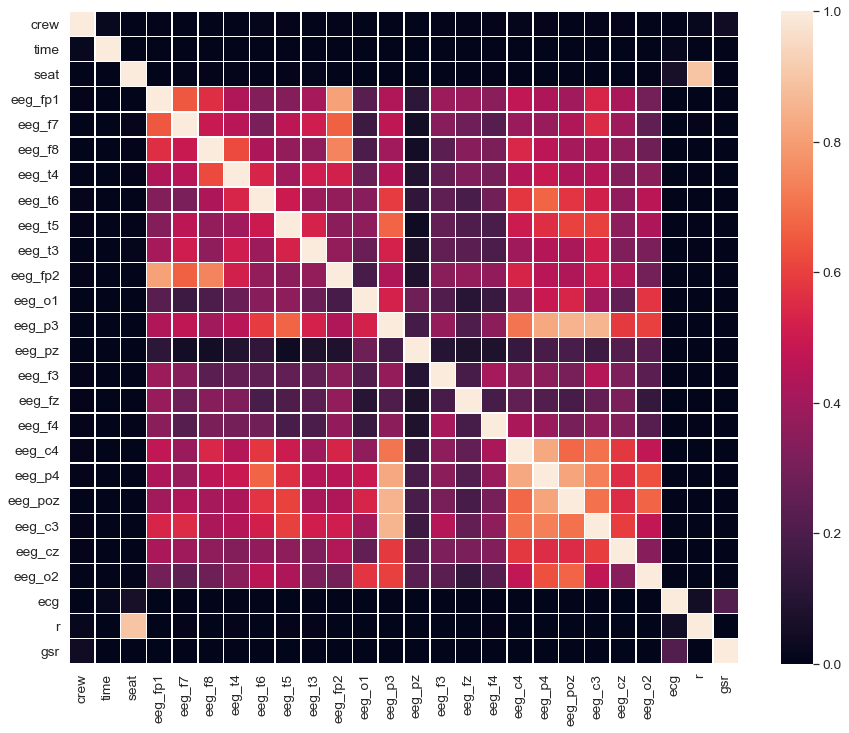

In [35]:
fig, ax = plt.subplots(figsize=(15, 12))
corr = train.corr()
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1)

In [36]:
cols = corr.nlargest(10, 'event')['event'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

KeyError: 'event'